In [ ]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"melagaramvenkatesh","key":"3edce46d2635225a27037d7221c3ea48"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten


Dataset URL: https://www.kaggle.com/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten
License(s): CC0-1.0
100% 4.76G/4.77G [00:51<00:00, 103MB/s] 
100% 4.77G/4.77G [00:51<00:00, 98.8MB/s]


In [ ]:
!unzip /content/fruit-and-vegetable-disease-healthy-vs-rotten.zip


Streaming output truncated to the last 5000 lines.
  inflating: Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (85).jpg  
  inflating: Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (86).jpg  
  inflating: Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (87).jpg  
  inflating: Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (88).jpg  
  inflating: Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (89).jpg  
  inflating: Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (9).jpg  
  inflating: Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (90).jpg  
  inflating: Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (91).jpg  
  inflating: Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (92).jpg  
  inflating: Fruit And Vegetable Diseases Dataset/Potato__Healthy/freshPotato (93).jpg  
  inflating: Fruit And Vegetable Diseases Dataset/Potato__He

In [ ]:
import numpy as np
import os
import shutil
from sklearn.model_selection import train_test_split

# Set the path to the dataset
dataset_dir = '/content/Fruit And Vegetable Diseases Dataset'
classes = os.listdir(dataset_dir)

# Create directories for train, val, and test sets
output_dir = 'output_dataset'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)[:200]

    print(cls, len(images))

    train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

    # Copy images to respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

print("Dataset split into training, validation, and test sets.")


Orange__Healthy 200
Guava__Rotten 200
Potato__Healthy 200
Carrot__Rotten 200
Orange__Rotten 200
Cucumber__Healthy 200
Jujube__Healthy 200
Banana__Rotten 200
Strawberry__Healthy 200
Bellpepper__Rotten 200
Pomegranate__Healthy 200
Bellpepper__Healthy 200
Strawberry__Rotten 200
Mango__Rotten 200
Banana__Healthy 200
Potato__Rotten 200
Grape__Rotten 200
Grape__Healthy 200
Apple__Healthy 200
Tomato__Rotten 200
Tomato__Healthy 200
Carrot__Healthy 200
Mango__Healthy 200
Guava__Healthy 200
Cucumber__Rotten 200
Jujube__Rotten 200
Pomegranate__Rotten 200
Apple__Rotten 200
Dataset split into training, validation, and test sets.


In [ ]:
# Define directories
dataset_dir = '/content/output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

# Define image size expected by the pre-trained model
IMG_SIZE = (224, 224)  # Common size for many models like ResNet, VGG, MobileNet

# Create ImageDataGenerators for resizing and augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and resize the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'  # Assuming binary classification for healthy vs rotten
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Do not shuffle test data
)

# Print class indices for reference
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)


Found 3359 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 'Mango__Healthy': 16, 'Mango__Rotten': 17, 'Orange__Healthy': 18, 'Orange__Rotten': 19, 'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21, 'Potato__Healthy': 22, 'Potato__Rotten': 23, 'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25, 'Tomato__Healthy': 26, 'Tomato__Rotten': 27}
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'G

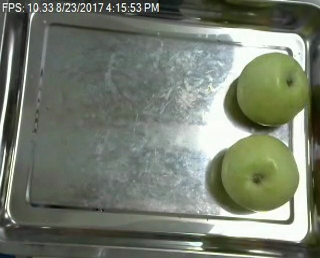

In [ ]:
#DATA VISUALIZATION
import os
import random
from IPython.display import display
from IPython.display import Image as IPImage  # Avoid name clash

# Specify the path to your image folder
folder_path = '/content/output_dataset/train/Apple__Healthy' # Replace with your actual folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Check if folder has images
if not image_files:
    print("No images found in the folder.")
else:
    # Select a random image from the list
    selected_image = random.choice(image_files)

    # Display the randomly selected image
    image_path = os.path.join(folder_path, selected_image)
    display(IPImage(filename=image_path))


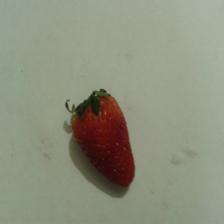

In [ ]:
import os
import random
from IPython.display import display
from IPython.display import Image as IPImage  # Avoid naming conflict

# Specify the path to your image folder
folder_path = '/content/output_dataset/test/Strawberry__Healthy'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(IPImage(filename=image_path))


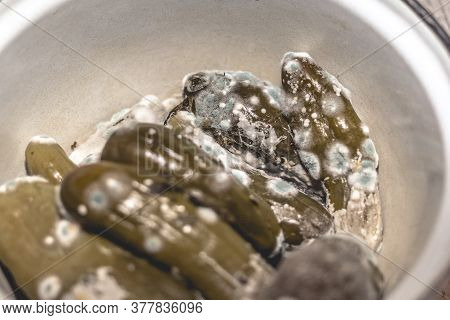

In [ ]:
import os
import random
from IPython.display import display
from IPython.display import Image as IPImage  # Avoid conflicts with PIL.Image

# Specify the path to your image folder
folder_path = '/content/output_dataset/test/Cucumber__Rotten'  # Replace with your actual folder path

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(IPImage(filename=image_path))


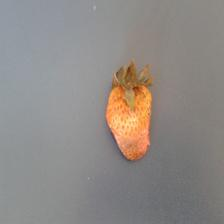

In [ ]:
import os
import random
from IPython.display import display
from IPython.display import Image as IPImage  # Rename to avoid conflicts

# Specify the path to your image folder
folder_path = '/content/output_dataset/test/Strawberry__Rotten'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(IPImage(filename=image_path))


Split Data And Model Building

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
trainpath = "/content/output_dataset/train"
testpath = "/content/output_dataset/test"

# Define data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train = train_datagen.flow_from_directory(
    trainpath,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'  # Assuming multi-class classification (28 classes)
)

test = test_datagen.flow_from_directory(
    testpath,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical'
)

Found 3359 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the VGG16 model without the top classification layer
vgg = VGG16(include_top=False, input_shape=(224, 224, 3))

# View the layer architecture
for layer in vgg.layers:
    print(layer)

# Freeze all VGG16 layers so they are not trainable
for layer in vgg.layers:
    layer.trainable = False

# Flatten the output of VGG16
x = Flatten()(vgg.output)

# Add a dense output layer for 28 classes (multi-class classification)
output = Dense(28, activation='softmax')(x)

# Define the final model
vgg16 = Model(inputs=vgg.input, outputs=output)

# Display the model summary
vgg16.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │       702,492 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,417,180 (58.81 MB)

 Trainable params: 702,492 (2.68 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

# Define optimizer with updated argument
opt = Adam(learning_rate=0.0001)

# Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=3,
    restore_best_weights=True
)

# Compile the model
vgg16.compile(
    optimizer=opt,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model with EarlyStopping
history = vgg16.fit(
    train,
    validation_data=test,
    epochs=15,
    steps_per_epoch=20,
    callbacks=[early_stopping]
)
vgg16.save('healthy_vs_rotten.h5')

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
13/20 ━━━━━━━━━━━━━━━━━━━━ 3s 475ms/step - accuracy: 0.0278 - loss: 3.5232

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


20/20 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.0437 - loss: 3.4511 - val_accuracy: 0.2268 - val_loss: 2.9223
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.2202 - loss: 2.8344 - val_accuracy: 0.3045 - val_loss: 2.5726
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.3250 - loss: 2.4597 - val_accuracy: 0.4509 - val_loss: 2.2334
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.4347 - loss: 2.1680 - val_accuracy: 0.4607 - val_loss: 2.0556
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.4947 - loss: 2.0148 - val_accuracy: 0.4893 - val_loss: 1.8932
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5776 - loss: 1.8212 - val_accuracy: 0.5018 - val_loss: 1.7677
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 0.5234 - loss: 1.7753 - val_accuracy: 0.5045 - val_loss: 1.6848
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.5824 - loss: 1.6432 - val_accuracy: 0.5893 - val_loss: 1.5541
Epo

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6510 - loss: 1.4493 - val_accuracy: 0.6143 - val_loss: 1.5273
Epoch 10/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6432 - loss: 1.4288 - val_accuracy: 0.6152 - val_loss: 1.4629
Epoch 11/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6636 - loss: 1.3356 - val_accuracy: 0.6455 - val_loss: 1.3988
Epoch 12/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6459 - loss: 1.3593 - val_accuracy: 0.6330 - val_loss: 1.3692
Epoch 13/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.6624 - loss: 1.3278 - val_accuracy: 0.6562 - val_loss: 1.3089
Epoch 14/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6941 - loss: 1.3029 - val_accuracy: 0.6527 - val_loss: 1.2793
Epoch 15/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.7333 - loss: 1.1290 - val_accuracy: 0.6812 - val_loss: 1.2120


In [ ]:
from google.colab import files
files.download('healthy_vs_rotten.h5')#to dowmload the model into local storage in pc for further usage.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]

Testing class-1

In [ ]:
img_path = '/content/output_dataset/train/Bellpepper__Healthy/freshPepper (102).jpg';

In [ ]:

import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

4

Testing class-2

In [ ]:
img_path = '/content/output_dataset/train/Mango__Rotten/rottenMango (157).jpg'

In [ ]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds
rounded_preds = np.round(preds, decimals=1)
print(rounded_preds)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]]


In [ ]:
labels[np.argmax(preds)]


4

Testing class-3

In [ ]:
img_path = '/content/output_dataset/train/Orange__Healthy/Screen Shot 2018-06-12 at 11.50.47 PM.png'

import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[5.0156364e-24, 3.0563792e-06, 0.0000000e+00, 0.0000000e+00,
        2.9959494e-28, 1.0533989e-22, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 8.2328387e-40, 0.0000000e+00, 0.0000000e+00,
        9.9999690e-01, 5.3703631e-19, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 1.4012985e-45, 1.0483535e-19, 0.0000000e+00,
        0.0000000e+00, 2.4331212e-25, 4.0231279e-42, 5.8795381e-36,
        1.6783493e-24, 0.0000000e+00, 0.0000000e+00, 5.4650640e-44]],
      dtype=float32)

In [ ]:
labels[np.argmax(preds)]

12

Testing class-4

In [ ]:
img_path = '/content/output_dataset/train/Cucumber__Healthy/freshCucumber (128).jpg'

import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        6.5235993e-32, 3.3745528e-30, 0.0000000e+00, 0.0000000e+00,
        1.0000000e+00, 1.8238843e-28, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],
      dtype=float32)

In [ ]:
labels[np.argmax(preds)]

8

Testing class-5

In [ ]:
img_path = '/content/output_dataset/train/Potato__Rotten/rottenPotato (112).jpg'

import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


array([[9.6792228e-22, 1.1235681e-13, 0.0000000e+00, 2.9554441e-37,
        1.5158125e-21, 7.2692164e-26, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 6.7342977e-33, 0.0000000e+00, 0.0000000e+00,
        2.7210414e-40, 3.3662472e-30, 1.6692365e-39, 2.0730853e-38,
        0.0000000e+00, 1.4900007e-41, 0.0000000e+00, 4.1264946e-35,
        1.1971490e-23, 9.1718684e-37, 1.0618146e-21, 1.0000000e+00,
        0.0000000e+00, 4.2038954e-45, 9.5234889e-30, 0.0000000e+00]],
      dtype=float32)

In [ ]:

labels[np.argmax(preds)]

23

Saving the model

In [ ]:
vgg16.save('healthy_vs_rotten.h5')

BUILDING PYTHON CODE:FLASK

 STEP 1: Install Required Libraries

In [ ]:
!pip install flask-ngrok pyngrok tensorflow pillow

 STEP 2: Upload Required Files

In [ ]:
from google.colab import files
files.upload()  # Upload your trained model: healthy_vs_rotten.h5

Saving healthy_vs_rotten.h5 to healthy_vs_rotten.h5
Buffered data was truncated after reaching the output size limit.

STEP 3: Create Folders and HTML Templates

In [ ]:
import os

# Create required folders
os.makedirs("templates", exist_ok=True)
os.makedirs("static/uploads", exist_ok=True)

# Save your NutriGaze HTML page
with open("templates/index.html", "w") as f:
    f.write("""
<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0"/>
  <title>NutriGaze - Greenguard Insights</title>
  <style>
    body { margin: 0; font-family: Arial, sans-serif; background-color: #fff; }
    header { background-color: #000; color: white; padding: 1rem 2rem; display: flex; justify-content: space-between; align-items: center; }
    nav a { color: white; margin-left: 1rem; text-decoration: none; font-weight: bold; }
    nav a.active, nav a:hover { border-bottom: 2px solid #fff; }
    .hero { background-image: url(https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTHV_Y3aMTapyi_R43Gk8YyuiCc4xaG5-HS3g&s); background-size: cover; background-position: center; color: white; text-align: center; padding: 100px 20px; }
    .hero h1 { font-size: 2.5rem; margin: 0.5rem 0; }
    .hero p { font-size: 1.2rem; margin-bottom: 1.5rem; }
    .btn { padding: 0.5rem 1.2rem; background: transparent; border: 1px solid white; color: white; cursor: pointer; }
    section { padding: 3rem 2rem; }
    .about { text-align: center; }
    .about h2 { color: #ff4c61; }
    .about .content { display: flex; flex-wrap: wrap; gap: 2rem; justify-content: center; margin-top: 2rem; }
    .box { flex: 1; max-width: 500px; text-align: left; }
    .about ul { list-style: none; padding-left: 1rem; }
    .about ul li::before { content: "✔ "; color: #ff4c61; }
    .predict { text-align: center; border-top: 1px solid #000; }
    .predict input[type="file"] { margin-top: 1rem; padding: 0.5rem; width: 300px; }
    .predict button { margin-top: 1rem; padding: 0.5rem 1rem; background-color: #28a745; color: white; border: none; cursor: pointer; }
    .output { text-align: center; padding: 3rem 2rem; background-color: #f9f9f9; }
    .output-box { display: inline-block; padding: 1.5rem; background-color: white; box-shadow: 0 0 10px rgba(0,0,0,0.1); margin-top: 1rem; }
    footer { background: #000; color: white; text-align: center; padding: 1rem; }
  </style>
</head>
<body>
  <header>
    <div><strong>NUTRIGAZE</strong></div>
    <nav>
      <a href="#home" class="active">Home</a>
      <a href="#about">About</a>
      <a href="#predict">Predict</a>
      <a href="#contact">Contact</a>
    </nav>
  </header>
  <section class="hero" id="home">
    <p>Welcome to <strong>NutriGaze</strong></p>
    <h1>GREENGUARD INSIGHTS</h1>
    <p>We are a team of innovative scientists and technologists dedicated to ensuring your produce is always fresh and healthy.</p>
    <button class="btn">GET STARTED</button>
  </section>
  <section class="about" id="about">
    <div class="label" style="color: #ff4c61; font-weight: bold;">ABOUT</div>
    <h2>Learn More <span style="color: black;">About Us</span></h2>
    <p>NutriGaze is a pioneering organization dedicated to enhancing the quality and safety of your fruits and vegetables.</p>
    <div class="content">
      <div class="box">
        <ul>
          <li>Comprehensive analysis and grading of fruits and vegetables based on ripeness and nutritional content.</li>
          <li>Continuous monitoring of produce freshness from farm to table.</li>
          <li>Innovative solutions to minimize food waste by identifying and separating rotten produce early in the supply chain.</li>
        </ul>
      </div>
      <div class="box">
        <p>Our team is our greatest asset. We are a diverse group of experts in fields such as agricultural science, data analytics, software engineering, and food technology. Together, we bring a wealth of knowledge and experience to tackle the challenges of food quality and safety.</p>
      </div>
    </div>
    <button class="btn" style="color:#ff4c61; border: 2px solid #ff4c61; background: white; margin-top: 2rem;">Learn More</button>
  </section>
  <section class="predict" id="predict">
    <h2>Image Classification</h2>
    <p>Upload Your Image:</p>
    <form action="/predict" method="POST" enctype="multipart/form-data">
      <input type="file" name="pc_image" required />
      <br/>
      <button type="submit">Predict</button>
    </form>
  </section>
  <section class="output">
    <h3>FreshEye Detection</h3>
    <div class="output-box">
      {% if predict %}
        <strong>Prediction Result:</strong><br/><br/>
        <p>{{ predict }}</p>
        <img src="{{ image_path }}" width="250">
      {% else %}
        <strong>Upload an image to see results</strong>
      {% endif %}
    </div>
  </section>
  <footer id="contact">
    &copy; 2025 NutriGaze. All rights reserved.
  </footer>
</body>
</html>
""")


STEP 4: Create and Run the Flask App

In [ ]:
!pip install flask pyngrok --quiet

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2yxTjB0PHLPqf0GigPWFF5PukrK_2adsKrhLSAq3HX9Rtpiic")

In [ ]:
from flask import Flask, request, render_template
from pyngrok import ngrok
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

app = Flask(__name__)

# Load your trained model
model = load_model("healthy_vs_rotten.h5")

# Labels
index = [
    'Apple_Rotten (0)', 'Apple_Healthy (1)', 'Banana_Healthy (2)', 'Banana_Rotten (3)',
    'Bellpepper_Healthy (4)', 'Bellpepper_Rotten (5)', 'Carrot_Rotten (6)', 'Carrot_Healthy (7)',
    'Cucumber_Rotten (8)', 'Cucumber_Healthy (9)', 'Grape_Healthy (10)', 'Grape_Rotten (11)',
    'Guava_Healthy (12)', 'Guava_Rotten (13)', 'Jujube_Healthy (14)', 'Jujube_Rotten (15)',
    'Mango_Healthy (16)', 'Mango_Rotten (17)', 'Orange_Healthy (18)', 'Orange_Rotten (19)',
    'Pomegranate_Healthy (20)', 'Pomegranate_Rotten (21)', 'Potato_Healthy (22)',
    'Potato_Rotten (23)', 'Strawberry_Healthy (24)', 'Strawberry_Rotten (25)',
    'Tomato_Healthy (26)', 'Tomato_Rotten (27)'
]

@app.route("/", methods=["GET"])
def home():
    return render_template("index.html", predict=None, image_path=None)

@app.route("/predict", methods=["POST"])
def predict():
    f = request.files['pc_image']
    save_path = os.path.join("static/uploads", f.filename)
    f.save(save_path)

    img = load_img(save_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    result = index[np.argmax(prediction)]

    return render_template("index.html", predict=result, image_path=save_path)

# Start ngrok and app
public_url = ngrok.connect(5000)
print("🚀 App is live at:", public_url)
app.run(port=5000)


🚀 App is live at: NgrokTunnel: "https://ae8e-35-247-173-68.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:34:39] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:34:42] "GET /favicon.ico HTTP/1.1" 404 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:35:14] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:35:15] "GET /static/uploads/2.jpg HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:35:53] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:35:53] "GET /static/uploads/3.jpg HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:36:22] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:36:23] "GET /static/uploads/RottenJujube%20(12).jpg HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:36:58] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:36:59] "GET /static/uploads/RottenGuava%20(10).jpg HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:38:00] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:38:01] "GET /static/uploads/FreshApple%20(5).jpg HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:38:37] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:38:38] "GET /static/uploads/FreshApple%20(51).jpg HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:39:11] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:39:13] "GET /static/uploads/freshTomato%20(2).png HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:39:43] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:39:44] "GET /static/uploads/freshTomato%20(1).png HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:40:21] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:40:22] "GET /static/uploads/rotated_by_15_Screen%20Shot%202018-06-07%20at%202.15.20%20PM.png HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:40:56] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:40:57] "GET /static/uploads/FreshApple%20(69).jpg HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:41:21] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:41:22] "GET /static/uploads/freshOrange%20(1).png HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:41:40] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:41:41] "GET /static/uploads/freshOrange%20(7).jpg HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:42:10] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:42:11] "GET /static/uploads/freshOrange%20(56).jpg HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:42:37] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:42:38] "GET /static/uploads/10.jpg HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:43:11] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Jun/2025 15:43:12] "GET /static/uploads/Banana__Healthy_augmented_6.jpg HTTP/1.1" 200 -
